In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df_orig= pd.read_csv('df_base')

In [3]:
df= pd.read_csv('cleaned_df')
pd.DataFrame(df)
df.head()

,Unnamed: 0,id,budget,original_language,popularity,release_date,runtime,title,revenue
0,0,1,14000000,en,6.575393,2/20/15,93.0,Hot Tub Time Machine 2,12314651
1,1,2,40000000,en,8.248895,8/6/04,113.0,The Princess Diaries 2: Royal Engagement,95149435
2,2,3,3300000,en,64.299990,10/10/14,105.0,Whiplash,13092000
3,3,4,1200000,hi,3.174936,3/9/12,122.0,Kahaani,16000000
4,4,5,0,ko,1.148070,2/5/09,118.0,Marine Boy,3923970


In [4]:
df.head()

,Unnamed: 0,id,budget,original_language,popularity,release_date,runtime,title,revenue
0,0,1,14000000,en,6.575393,2/20/15,93.0,Hot Tub Time Machine 2,12314651
1,1,2,40000000,en,8.248895,8/6/04,113.0,The Princess Diaries 2: Royal Engagement,95149435
2,2,3,3300000,en,64.299990,10/10/14,105.0,Whiplash,13092000
3,3,4,1200000,hi,3.174936,3/9/12,122.0,Kahaani,16000000
4,4,5,0,ko,1.148070,2/5/09,118.0,Marine Boy,3923970


In [5]:
df_orig= df_orig.drop(columns=['poster_path', 'runtime', 'original_language','homepage', 'imdb_id', 'original_title', 'overview', 'status', 'Keywords', 'tagline', 'cast', 'crew', 'production_companies', 'production_countries', 'spoken_languages'])

In [6]:
df=df_orig

In [7]:
df.isnull().sum()

Unnamed: 0                  0
id                          0
belongs_to_collection    2396
budget                      0
genres                      7
popularity                  0
release_date                0
title                       0
revenue                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
Unnamed: 0               3000 non-null int64
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
popularity               3000 non-null float64
release_date             3000 non-null object
title                    3000 non-null object
revenue                  3000 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 211.0+ KB


In [9]:
#need to get rid of nulls and replace with '0'
df= df.fillna(0)


In [10]:
#All films that beloing to a collection (book, franchise, etc.) assigned a 1
df.belongs_to_collection.loc[df['belongs_to_collection']!=0]=1

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
df['popularity'].describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

In [12]:
#create a feature that is gross profit pct_profit
df['gross_profit']= df['revenue']- df['budget']

In [13]:
df['gross_profit'].describe()

count    3.000000e+03
mean     4.419452e+07
std      1.123274e+08
min     -1.074474e+08
25%      1.795200e+04
50%      6.121122e+06
75%      4.143293e+07
max      1.316249e+09
Name: gross_profit, dtype: float64

In [14]:
#Creating a pct profit column
df['pct_profit']= (df['gross_profit']/df['revenue']*100).round(2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
Unnamed: 0               3000 non-null int64
id                       3000 non-null int64
belongs_to_collection    3000 non-null int64
budget                   3000 non-null int64
genres                   3000 non-null object
popularity               3000 non-null float64
release_date             3000 non-null object
title                    3000 non-null object
revenue                  3000 non-null int64
gross_profit             3000 non-null int64
pct_profit               3000 non-null float64
dtypes: float64(2), int64(6), object(3)
memory usage: 257.9+ KB


In [16]:
df['pct_profit'].describe()

count    3.000000e+03
mean    -1.978185e+05
std      4.921366e+06
min     -1.916666e+08
25%      1.466250e+01
50%      7.059000e+01
75%      1.000000e+02
max      1.000000e+02
Name: pct_profit, dtype: float64

In [17]:
#Will drop all movies with no budget listed
df = df[df.budget != 0]
df.describe()

,Unnamed: 0,id,belongs_to_collection,budget,popularity,revenue,gross_profit,pct_profit
count,2188.000000,2188.000000,2188.000000,2.188000e+03,2188.000000,2.188000e+03,2.188000e+03,2.188000e+03
mean,1507.420475,1508.420475,0.227605,3.089305e+07,9.700621,8.696605e+07,5.607299e+07,-2.712690e+05
std,863.873942,863.873942,0.419382,4.026785e+07,13.753541,1.554912e+08,1.285858e+08,5.761282e+06
min,0.000000,1.000000,0.000000,1.000000e+00,0.001880,1.000000e+00,-1.074474e+08,-1.916666e+08
25%,756.250000,757.250000,0.000000,5.150000e+06,5.398055,6.816828e+06,-1.606973e+06,-2.726250e+01
50%,1514.500000,1515.500000,0.000000,1.600000e+07,8.323165,2.891063e+07,1.034417e+07,5.009500e+01
75%,2245.500000,2246.500000,0.000000,4.000000e+07,11.657305,1.000342e+08,6.191157e+07,7.593750e+01
max,2999.000000,3000.000000,1.000000,3.800000e+08,294.337037,1.519558e+09,1.316249e+09,1.000000e+02


In [17]:
#Looking for correlations
corr_matrix= df.corr()

In [18]:
#looking at each attribute's correlation
corr_matrix['pct_profit'].sort_values(ascending=False)

pct_profit               1.000000
gross_profit             0.021035
belongs_to_collection    0.020147
revenue                  0.019515
id                       0.016261
Unnamed: 0               0.016261
popularity               0.012813
budget                   0.008671
Name: pct_profit, dtype: float64

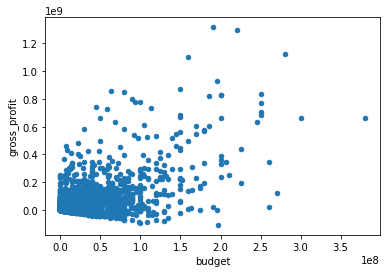

In [19]:
df.plot.scatter('budget','gross_profit')

In [20]:
df.isnull().sum()

Unnamed: 0               0
id                       0
belongs_to_collection    0
budget                   0
genres                   0
popularity               0
release_date             0
title                    0
revenue                  0
gross_profit             0
pct_profit               0
dtype: int64

In [21]:
df.describe()

,Unnamed: 0,id,belongs_to_collection,budget,popularity,revenue,gross_profit,pct_profit
count,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03
mean,1499.500000,1500.500000,0.201333,2.253133e+07,8.463274,6.672585e+07,4.419452e+07,-1.978185e+05
std,866.169729,866.169729,0.401063,3.702609e+07,12.104000,1.375323e+08,1.123274e+08,4.921366e+06
min,0.000000,1.000000,0.000000,0.000000e+00,0.000001,1.000000e+00,-1.074474e+08,-1.916666e+08
25%,749.750000,750.750000,0.000000,0.000000e+00,4.018053,2.379808e+06,1.795200e+04,1.466250e+01
50%,1499.500000,1500.500000,0.000000,8.000000e+06,7.374861,1.680707e+07,6.121122e+06,7.059000e+01
75%,2249.250000,2250.250000,0.000000,2.900000e+07,10.890983,6.891920e+07,4.143293e+07,1.000000e+02
max,2999.000000,3000.000000,1.000000,3.800000e+08,294.337037,1.519558e+09,1.316249e+09,1.000000e+02


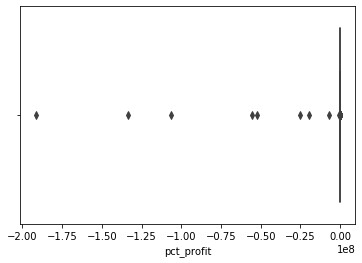

In [23]:
sns.boxplot(x=df["pct_profit"])

In [24]:
df.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,popularity,release_date,title,revenue,gross_profit,pct_profit
0,0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",6.575393,2/20/15,Hot Tub Time Machine 2,12314651,-1685349,-13.69
1,1,2,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.248895,8/6/04,The Princess Diaries 2: Royal Engagement,95149435,55149435,57.96
2,2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",64.299990,10/10/14,Whiplash,13092000,9792000,74.79
3,3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",3.174936,3/9/12,Kahaani,16000000,14800000,92.50
4,4,5,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.148070,2/5/09,Marine Boy,3923970,3923970,100.00


In [26]:
#df[df[['revenue']].replace('[\$,]', '', regex=True).astype(float)]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
Unnamed: 0               3000 non-null int64
id                       3000 non-null int64
belongs_to_collection    3000 non-null int64
budget                   3000 non-null int64
genres                   3000 non-null object
popularity               3000 non-null float64
release_date             3000 non-null object
title                    3000 non-null object
revenue                  3000 non-null int64
gross_profit             3000 non-null int64
pct_profit               3000 non-null float64
dtypes: float64(2), int64(6), object(3)
memory usage: 257.9+ KB


In [30]:
df['budget'].count()

3000